# Phased Analysis

Fermipy provides several options to support analysis with selections on pulsar phase.

This example script will use the pre-made event files included in the repository. These event files have the PULSE_PHASE column added, which lists the pulsar phase for each recorded event. We can then use this information to perform analyses on the pulsar both during and between the pulses.

Also included is a tutorial on how to add the PULSE_PHASE column to an event file. Note that performing the analysis from the raw data can take multiple hours to process.

To perform a phased analysis, the configuration file must have some additional parameters.

The gtlike.expscale parameter defines the correction that should be applied to the nominal exposure to account for the phase selection defined by selection.phasemin and selection.phasemax. Normally this should be set to the size of the phase selection interval, i.e. $\rm{expscale}=\rm{phasemax}-\rm{phasemin}$.

To perform a joint analysis of multiple phase selections we need to use the components section to define separate ON- and OFF-phase components. We use the gtlike.src_expscale parameter to zero out the 3FGL source component in the OFF phase. For the ON-phase of ``3FGL J0633.9+1746'' we set $\rm{src\_expscale}=1$, and for the OFF-phase we set $\rm{src\_expscale}=0$.

The components selection of the config file is then constructed as:

Where the process of determining the values used for the phases will be shown later. In general the src_expscale parameter can be used to define an exposure correction for indvidual sources.

# Data Preparation

This section will go over adding the pulsar ephemeris to the event files. This will require downloading the raw data from the [Fermi SSC website](https://fermi.gsfc.nasa.gov/cgi-bin/ssc/LAT/LATDataQuery.cgi).

This section can be skipped by using the pre-processed data included in the repository. 

To analyse from scratch, download the data from the [FSSC website](https://fermi.gsfc.nasa.gov/cgi-bin/ssc/LAT/LATDataQuery.cgi) using the following selections:

* Object name or coordinates: 98.4792,17.7729
* Coordinate system: J2000
* Search radius (deg): 12
* Observation dates: 239804670,743358091
* Time system: MET
* Energy Range (MeV): 1000, 316228
* LAT data type: photon
* Spacecraft data: yes

The following cell can be used to set up the directory structure and download the data from the FSSC servers. Note that you will likely need to change the file names for the `wget' lines.

In [42]:
# # Set up a subdirectory for the data
# !mkdir -p Geminga_data/

# # Set up a subdirectory for the raw data
# !mkdir -p Geminga_rawdata/PH
# !mkdir -p Geminga_rawdata/SC

# # Download the data and place into the subdirectory
# !wget -P ./Geminga_rawdata/PH/ https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L240723161301912CDF4657_PH00.fits
# !wget -P ./Geminga_rawdata/PH/ https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L240723161301912CDF4657_PH01.fits
# !wget -P ./Geminga_rawdata/PH/ https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L240723161301912CDF4657_PH02.fits
# !wget -P ./Geminga_rawdata/PH/ https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L240723161301912CDF4657_PH03.fits
# !wget -P ./Geminga_rawdata/PH/ https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L240723161301912CDF4657_PH04.fits

# !wget -P ./Geminga_rawdata/SC/ https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L240723161301912CDF4657_SC00.fits

# # As the preprocessing steps append data to the SC file, create a copy
# !cp ./Geminga_rawdata/SC/L240723161301912CDF4657_SC00.fits ./Geminga_rawdata/SC/SC_copy.fits

# # Make a file list of the photon files
# !ls ./Geminga_rawdata/PH/*PH*.fits > ./Geminga_rawdata/PH.txt

Download the ephemeris data from the FSSC website. A list of all ephermiris data [can be found here](https://fermi.gsfc.nasa.gov/ssc/data/access/lat/ephems/), though more up-to-date ephemerides will likely be required for use in current analyses.

In [44]:
# # Download the ephemeris data for the Geminga pulsar
# !wget -P ./Geminga_data/ https://fermi.gsfc.nasa.gov/ssc/data/access/lat/ephems/0633+1746/0633+1746_ApJ_720_272_2010_D4.fits
# !wget -P ./Geminga_data/ https://fermi.gsfc.nasa.gov/ssc/data/access/lat/ephems/0633+1746/0633+1746_ApJ_720_272_2010.par

The following is a brief tutorial of using ephemeris data to add the PULSE_PHASE column to the event file.
We will use the bash fermitools to both prepare the evfile and to add the column.

For this tutorial we will use a simplified form of ephemeris file (named a D4 file). These files cover shorter time frames. The benefit is that we can use the built-in functions within the bash fermitools to perform the calculations.

For more complicated ephemerides that cover larger time frames, such as those stored in .par files, you will need to install TEMPO2 to perform the required calculations to add the PULSE_PHASE column.

The bash commands we use to prepare the data are: [gtselect](https://fermi.gsfc.nasa.gov/ssc/data/p6v11/analysis/scitools/help/gtselect.txt), [gtmktime](https://fermi.gsfc.nasa.gov/ssc/data/p6v11/analysis/scitools/help/gtmktime.txt), [gtbin](https://fermi.gsfc.nasa.gov/ssc/data/p6v11/analysis/scitools/help/gtbin.txt), [gtpphase](https://fermi.gsfc.nasa.gov/ssc/data/p6v11/analysis/scitools/help/gtpphase.txt) (click for documentation).

In [90]:
# %%bash
# gtselect evclass=128 evtype=3
#     @./Geminga_rawdata/PH.txt
#     ./Geminga_data/Geminga.fits
#     INDEF
#     INDEF
#     INDEF
#     INDEF
#     INDEF
#     100
#     316227.76
#     105

In [91]:
# %%bash
# gtmktime
#     ./Geminga_rawdata/SC/SC_copy.fits
#     (DATA_QUAL>0)&&(LAT_CONFIG==1)
#     no
#     ./Geminga_data/Geminga.fits
#     ./Geminga_data/Geminga_gtis.fits

In [92]:
# %%bash
# gtbin
#     CMAP
#     ./Geminga_data/Geminga_gtis.fits
#     ./Geminga_data/Geminga_cmap.fits
#     ./Geminga_rawdata/SC/SC_copy.fits
#     300
#     300
#     0.1
#     CEL
#     98.4756
#     17.7703
#     0
#     CAR

In [93]:
# %%bash
# gtpphase
#     ./Geminga_data/Geminga_gtis.fits
#     ./Geminga_rawdata/SC/SC_copy.fits
#     ./Geminga_data/0633+1746_ApJ_720_272_2010_D4.fits
#     J0633+1746
#     DB

# Combined ON- and OFF-phase analysis

Import libraries

In [50]:
from fermipy import utils
from fermipy.gtanalysis import GTAnalysis
import argparse
from fermipy.castro import CastroData
from fermipy.plotting import ROIPlotter, SEDPlotter
import astropy.io.fits as pyfits
from math import *
import matplotlib.pyplot as plt
utils.init_matplotlib_backend()
import numpy as np
from scipy.integrate import quad
from IPython.display import Image
import os

If the data is not available, download it from the repository.

If you want to perform the analysis on data that hasn't been pre-processed, only unpack the config file from the tarball.

In [51]:
if not os.path.isfile('./Geminga_data/config_phase.yaml'):

    if not os.path.isfile('./../data/Geminga_data.tar.gz'):

        !curl -OL --output-dir ./../data/ https://raw.githubusercontent.com/fermiPy/fermipy-extras/master/data/Geminga_data.tar.gz

    !tar xzf ./../data/Geminga_data.tar.gz

Plot a phase diagram for the pulsar.

<Figure size 640x480 with 0 Axes>

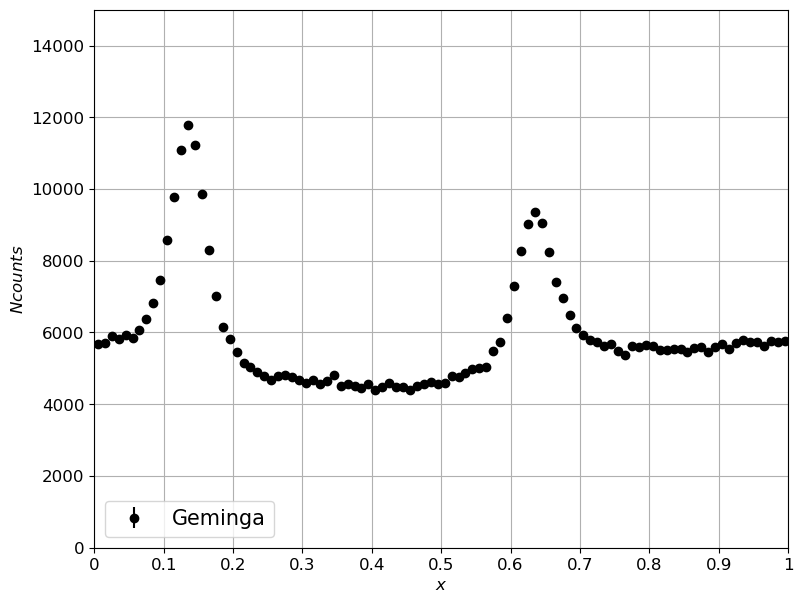

In [60]:
table = pyfits.open('./Geminga_data/Geminga_gtis.fits')

tabledata = table[1].data 
phasevec = tabledata.field('PULSE_PHASE')

phase_bins = np.arange(0.,1.01,0.01)
phase_val = np.arange(0.+0.005,1.0,0.01)
histo_phase = np.histogram(phasevec,phase_bins)

plt.clf()
fig = plt.figure(figsize=(8,6))
plt.errorbar(phase_val, histo_phase[0], yerr=np.sqrt(histo_phase[0]), fmt="o", color="black",label="Geminga")
plt.ylabel(r'$N counts$')
plt.xlabel(r'$x$')
plt.axis([0.,1.0,0.0,1.5e4])
plt.grid(True)
plt.yscale('linear')
plt.xscale('linear')
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
           [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.legend(loc=3,prop={'size':15},numpoints=1, scatterpoints=1, ncol=1)
fig.tight_layout(pad=0.5)
plt.savefig("./Geminga_data/phase_Geminga.png")
plt.show()

From the phase plot we can see P1 in the range $0.05<x<0.20$, off-peak in the range $0.20>x>0.55$, P2 in the range $0.55<x<0.70$, and bridge emission for $0.70<x<1.00$.

In this tutorial we will compare the ON- and OFF-phase emission, i.e. we will analyse P1 and the off-peak emission. Hence, we choose phasemax=0.20, phasemin=0.05 for the ON-phase analysis, and phasemax=0.55, phasemin=0.20 for the OFF-phase analysis.
These values are included in the configuration file that we will use.

Begin the analysis. If using the pre-processed data this step should take on the order of minutes. If the pre-processed data is not available, this step will take on the order of hours.
If re-running this block after generating the srcmap .fits files, it should take approximately a minute.

In [61]:
gta = GTAnalysis('./Geminga_data/config_phase.yaml')
gta.setup()

2024-08-06 12:50:29 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version 1.2.2 
ScienceTools version 2.2.0


{'Prefactor': 0, 'Index1': 1, 'Scale': 2, 'Cutoff': 3, 'Index2': 4}


2024-08-06 12:50:30 INFO    GTAnalysis.setup(): Running setup.
2024-08-06 12:50:30 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2024-08-06 12:50:30 INFO    GTBinnedAnalysis.run_gtapp(): Running gtselect.
2024-08-06 12:50:30 INFO    GTBinnedAnalysis.run_gtapp(): time -p gtselect infile=/home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/Geminga_data/Geminga_gtis.fits outfile=/home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/Geminga_data/ft1_00.fits ra=98.47879791259766 dec=17.7731990814209 rad=8.985281374238571 tmin=239557417.0 tmax=283910400.0 emin=1000.0 emax=316227.76 zmin=0.0 zmax=105.0 evclass=128 evtype=3 convtype=-1 phasemin=0.05 phasemax=0.2 evtable="EVENTS" chatter=3 clobber=yes debug=no gui=no mode="ql"


{'Prefactor': 0, 'Index1': 1, 'Scale': 2, 'Cutoff': 3, 'Index2': 4}


2024-08-06 12:50:30 INFO    GTBinnedAnalysis.run_gtapp(): This is gtselect version HEAD
2024-08-06 12:50:30 INFO    GTBinnedAnalysis.run_gtapp(): Applying filter string: ((EVENT_CLASS&o200) != o0) && angsep(RA,DEC,98.47879791,17.77319908) < 8.985281374 && ((EVENT_TYPE&o3) != o0) && 1000 < ENERGY && ENERGY <= 316227.76000000000931 && 0.050000000000000002776 < PULSE_PHASE && PULSE_PHASE <= 0.2000000000000000111 && 239557417 < TIME && TIME <= 283910400 && 0 < ZENITH_ANGLE && ZENITH_ANGLE <= 105 && gtifilter()
2024-08-06 12:50:31 INFO    GTBinnedAnalysis.run_gtapp(): Done.
2024-08-06 12:50:31 INFO    GTBinnedAnalysis.run_gtapp(): Finished gtselect. Execution time: 1.21 s
2024-08-06 12:50:31 INFO    GTBinnedAnalysis.run_gtapp(): Running gtltcube.
2024-08-06 12:50:31 INFO    GTBinnedAnalysis.run_gtapp(): time -p gtltcube evfile="/home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/Geminga_data/ft1_00.fits" evtable="EVENTS" scfile=./Geminga_rawdata/SC/SC_copy.fits sctable="S

In [62]:
gta.print_model()

2024-08-06 14:06:17 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0633.9+1746      0.000   2.976   0.00151   3.12       nan     42003.8     
3FGL J0626.8+1743      1.684   2.300  1.69e-06   2.70       nan        21.4     
3FGL J0631.2+2019      2.634   0.529  1.95e-06   2.46       nan        20.1     
3FGL J0647.8+1751      3.317   2.178  9.76e-07   2.70       nan        12.4     
3FGL J0648.1+1606      3.793   0.431  2.26e-06   1.77       nan         7.6     
3FGL J0648.8+1516      4.358   1.092   1.2e-05   1.83       nan        45.1     
3FGL J0650.5+2055      5.040   0.802  6.84e-06   1.56       nan        13.7     
3FGL J0610.6+1728      5.546   0.522  2.26e-06   4.85       nan        42.9     
3FGL J0611.5+1957      5.714   0.967  3.93e-06   2.38       nan        36.5     
3FGL J0619.4+2242      5.980   0.381  7.81e-06   2.01 

Now we perform a first fit to the ROI.

In [63]:
gta.free_sources()
gta.optimize()

2024-08-06 14:06:17 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0633.9+1746     : ['Prefactor', 'Index1', 'Cutoff']
2024-08-06 14:06:17 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0626.8+1743     : ['Prefactor', 'Index']
2024-08-06 14:06:17 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0631.2+2019     : ['Prefactor', 'Index']
2024-08-06 14:06:17 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0647.8+1751     : ['Prefactor', 'Index']
2024-08-06 14:06:17 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0648.1+1606     : ['Prefactor', 'Index']
2024-08-06 14:06:17 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0648.8+1516     : ['Prefactor', 'Index']
2024-08-06 14:06:17 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0650.5+2055     : ['Prefactor', 'Index']
2024-08-06 14:06:17 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0610.6+1728     : ['norm', 'alpha', 'b

Joint fit  ['3FGL J0633.9+1746', 'galdiff']
Fitting shape 3FGL J0633.9+1746 TS: 179148.448
Fitting shape galdiff TS:  49872.792
Fitting shape 3FGL J0619.4+2242 TS:    520.300
Fitting shape 3FGL J0648.8+1516 TS:    126.285
Fitting shape 3FGL J0650.5+2055 TS:     31.704


2024-08-06 14:06:21 INFO    GTAnalysis.optimize(): Finished
2024-08-06 14:06:21 INFO    GTAnalysis.optimize(): LogLike: -26231.637120 Delta-LogLike: 7660.387064
2024-08-06 14:06:21 INFO    GTAnalysis.optimize(): Execution time: 4.00 s


Fitting shape isodiff TS:     30.288


{'loglike0': -33892.024184608636,
 'loglike1': -26231.637120264346,
 'dloglike': 7660.38706434429,
 'config': {'npred_threshold': 1.0,
  'npred_frac': 0.95,
  'shape_ts_threshold': 25.0,
  'max_free_sources': 5,
  'skip': [],
  'optimizer': {'optimizer': 'MINUIT',
   'tol': 0.001,
   'max_iter': 100,
   'init_lambda': 0.0001,
   'retries': 3,
   'min_fit_quality': 2,
   'verbosity': 0}}}

Delete sources with TS<12.

In [64]:
gta.print_model()
gta.delete_sources(minmax_ts=[None,12])
gta.print_model()

2024-08-06 14:06:21 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0633.9+1746      0.000   1.109    0.0008   2.80 201341.12     20155.5    *
3FGL J0626.8+1743      1.684   6.861  5.03e-06   2.70     13.40        63.8    *
3FGL J0631.2+2019      2.634   0.022  8.15e-08   2.46      0.02         0.8    *
3FGL J0647.8+1751      3.317   0.690  3.09e-07   2.70      0.40         3.9    *
3FGL J0648.1+1606      3.793   0.057  2.97e-07   1.77      0.11         1.0    *
3FGL J0648.8+1516      4.358   1.096  2.07e-05   1.60    134.69        45.6    *
3FGL J0650.5+2055      5.040   0.559  8.65e-06   1.26     34.12         8.7    *
3FGL J0610.6+1728      5.546   0.000  4.32e-11   4.85     -0.00         0.0    *
3FGL J0611.5+1957      5.714   0.000  4.07e-11   2.38     -0.00         0.0    *
3FGL J0619.4+2242      5.980   3.228  5.79e-05   2.71 

Perform a fit.

In [65]:
gta.fit()
gta.print_model()

2024-08-06 14:06:21 INFO    GTAnalysis.fit(): Starting fit.
2024-08-06 14:06:24 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2024-08-06 14:06:24 INFO    GTAnalysis.fit(): LogLike:   -26228.310 DeltaLogLike:        4.704 
2024-08-06 14:06:24 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0633.9+1746      0.000   1.110    0.0008   2.80 180476.66     20144.4    *
3FGL J0626.8+1743      1.684  46.829   4.7e-06   5.00     22.63       110.7    *
3FGL J0648.8+1516      4.358   1.090  2.06e-05   1.60    131.36        45.4    *
3FGL J0650.5+2055      5.040   0.544   8.6e-06   1.25     32.94         8.5    *
3FGL J0619.4+2242      5.980   3.203  5.78e-05   2.73    604.13       454.2    *
isodiff                  ---   0.900    0.0272   2.12     43.27       613.9    *
galdiff                  ---   1.329     0.

Now we run the gta.tsmap tool and gta.residmap to make a TS map and residual map to find the residuals in the ROI with respect to our initial model.

In [66]:
tsmap_initial = gta.tsmap(prefix='TSmap_initial',
                          make_plots=True,
                          write_fits=True,
                          write_npy=True)

2024-08-06 14:06:24 INFO    GTAnalysis.tsmap(): Generating TS map
2024-08-06 14:06:26 INFO    GTAnalysis._make_tsmap_fast(): Fitting test source.
2024-08-06 14:06:45 INFO    GTAnalysis.tsmap(): Finished TS map
2024-08-06 14:06:59 WARNING GTAnalysis.tsmap(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/Geminga_data/TSmap_initial_pointsource_powerlaw_2.00_tsmap.npy
2024-08-06 14:06:59 INFO    GTAnalysis.tsmap(): Execution time: 34.76 s


<Figure size 640x480 with 0 Axes>

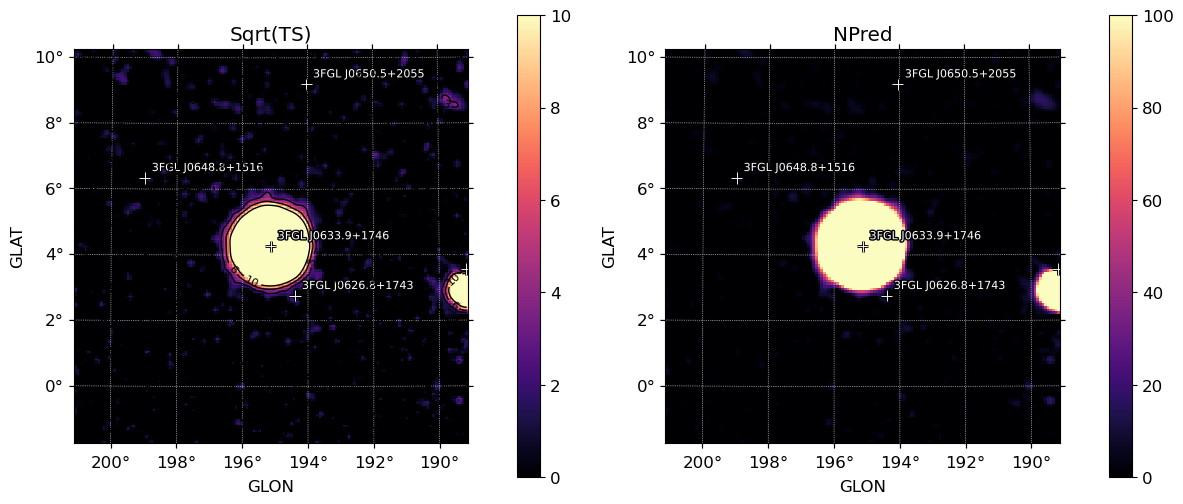

In [67]:
plt.clf()
fig = plt.figure(figsize=(14,6))
ROIPlotter(tsmap_initial['sqrt_ts'],roi=gta.roi).plot(levels=[0,3,6,10],vmin=0,vmax=10,subplot=121,cmap='magma')
plt.gca().set_title('Sqrt(TS)')
ROIPlotter(tsmap_initial['npred'],roi=gta.roi).plot(vmin=0,vmax=100,subplot=122,cmap='magma')
plt.gca().set_title('NPred')
plt.show()

In [68]:
resid = gta.residmap('residualmap_initial',
                     write_fits=True,
                     write_npy=True,
                     make_plots=True)

2024-08-06 14:07:00 INFO    GTAnalysis.residmap(): Generating residual maps
2024-08-06 14:07:00 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2024-08-06 14:07:06 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2024-08-06 14:07:08 INFO    GTAnalysis.residmap(): Finished residual maps
2024-08-06 14:07:19 WARNING GTAnalysis.residmap(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/Geminga_data/residualmap_initial_pointsource_powerlaw_2.00_residmap.npy
2024-08-06 14:07:19 INFO    GTAnalysis.residmap(): Execution time: 19.30 s


<Figure size 640x480 with 0 Axes>

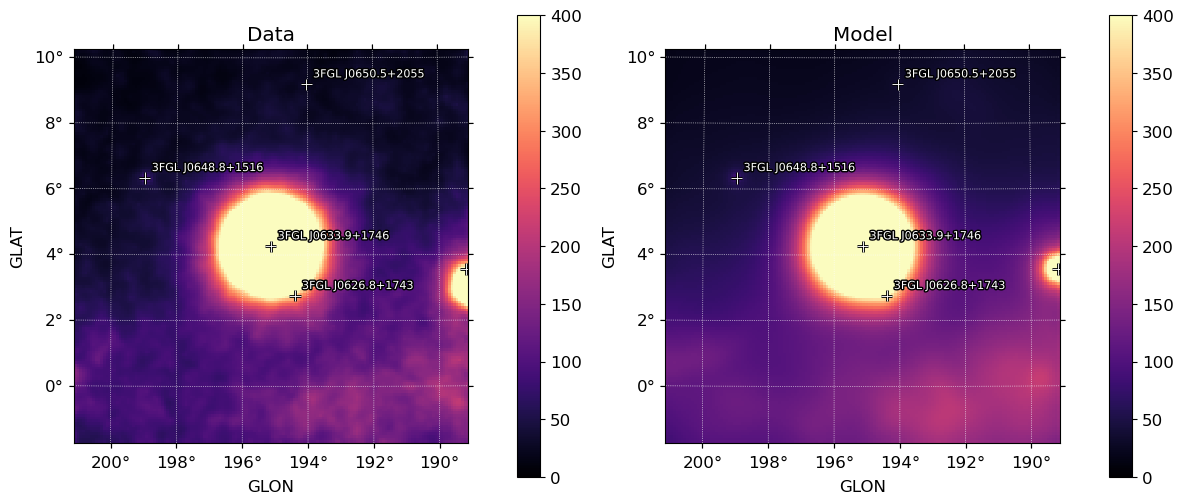

In [69]:
plt.clf()
fig = plt.figure(figsize=(14,6))
ROIPlotter(resid['data'],roi=gta.roi).plot(vmin=0,vmax=400,subplot=121,cmap='magma')
plt.gca().set_title('Data')
ROIPlotter(resid['model'],roi=gta.roi).plot(vmin=0,vmax=400,subplot=122,cmap='magma')
plt.gca().set_title('Model')
plt.show()

<Figure size 640x480 with 0 Axes>

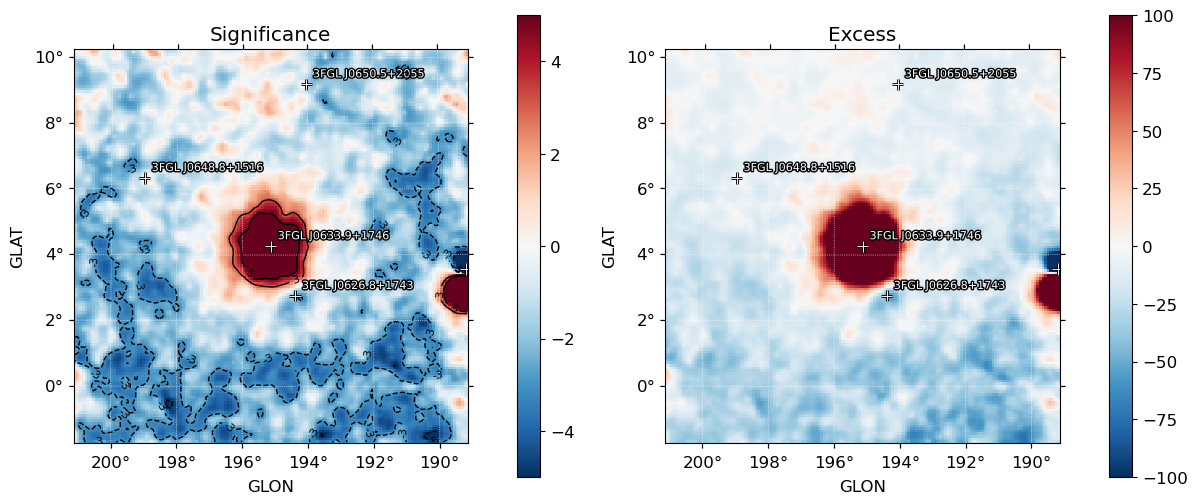

In [70]:
plt.clf()
fig = plt.figure(figsize=(14,6))
ROIPlotter(resid['sigma'],roi=gta.roi).plot(vmin=-5,vmax=5,levels=[-5,-3,3,5],subplot=121,cmap='RdBu_r')
plt.gca().set_title('Significance')
ROIPlotter(resid['excess'],roi=gta.roi).plot(vmin=-100,vmax=100,subplot=122,cmap='RdBu_r')
plt.gca().set_title('Excess')
plt.show()

2024-08-06 14:07:21 INFO    GTBinnedAnalysis.write_xml(): Writing /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/Geminga_data/initial_00.xml...
2024-08-06 14:07:21 INFO    GTBinnedAnalysis.write_xml(): Writing /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/Geminga_data/initial_01.xml...
2024-08-06 14:07:21 INFO    GTAnalysis.write_fits(): Writing /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/Geminga_data/initial.fits...
2024-08-06 14:07:35 INFO    GTBinnedAnalysis.write_model_map(): Generating model map for component 00.
2024-08-06 14:07:36 INFO    GTBinnedAnalysis.write_model_map(): Generating model map for component 01.
2024-08-06 14:07:39 INFO    GTAnalysis.write_roi(): Writing /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/Geminga_data/initial.npy...


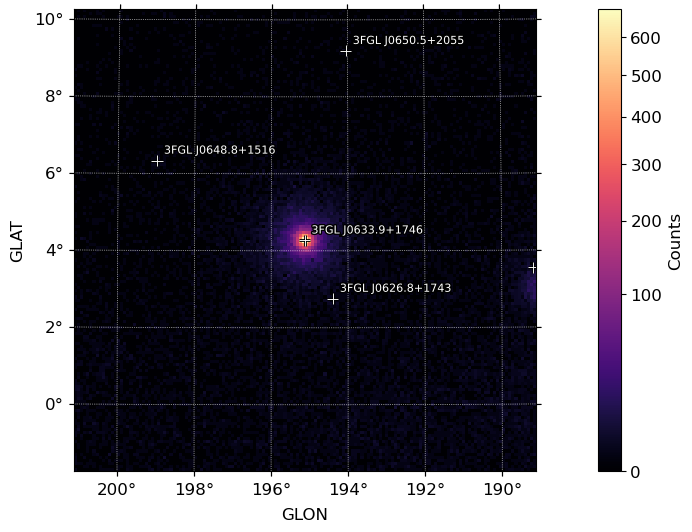

In [71]:
gta.write_roi('initial',
              make_plots=True,
              save_model_map=True)
plt.show()

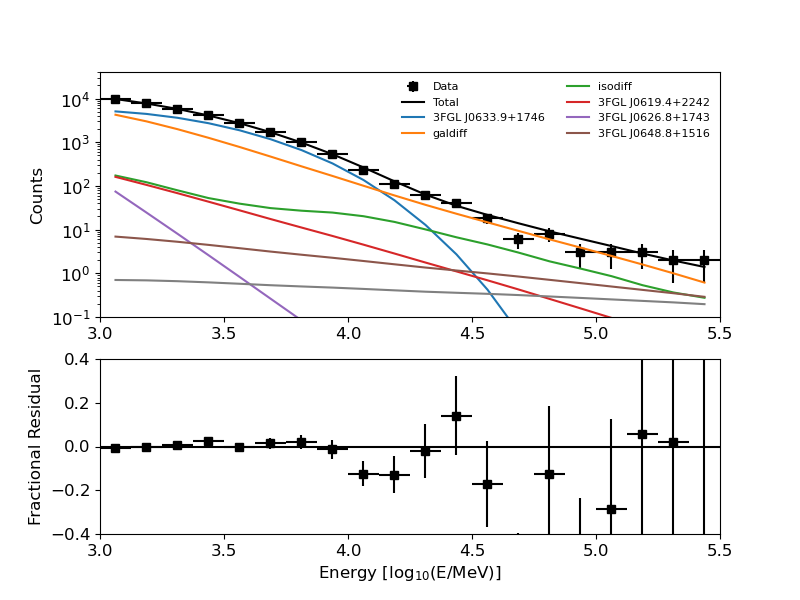

In [72]:
Image(filename='./Geminga_data/initial_counts_spectrum.png') 

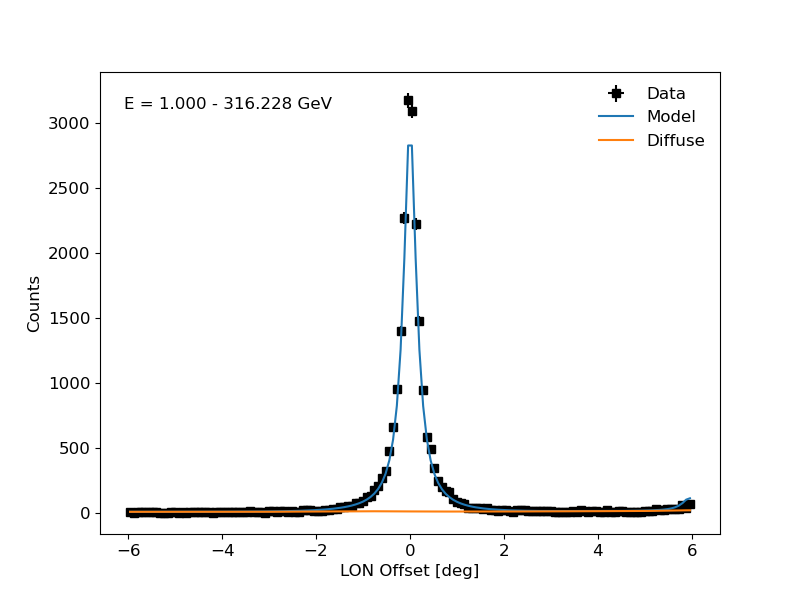

In [73]:
Image(filename='./Geminga_data/initial_counts_map_xproj_3.000_5.500.png') 

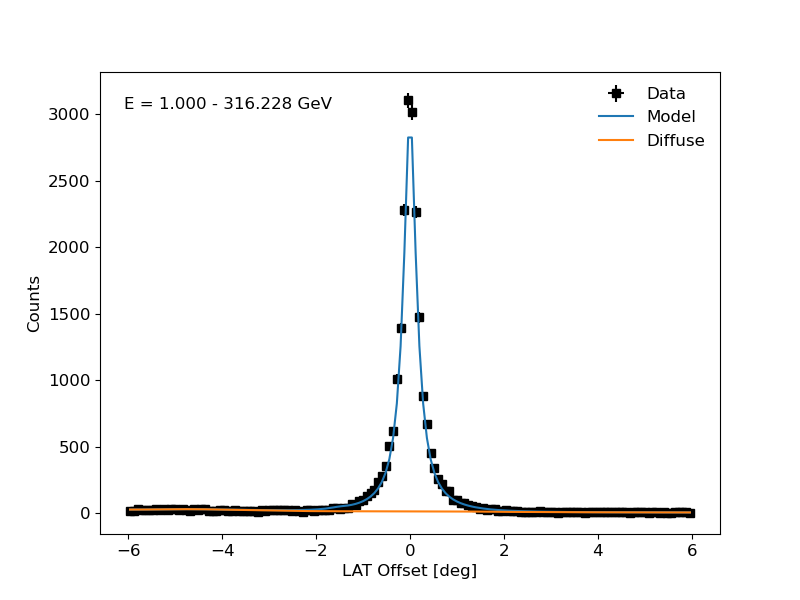

In [74]:
Image(filename='./Geminga_data/initial_counts_map_yproj_3.000_5.500.png') 

It is clear from the TS and residual map there is an excess at the location of Geminga.

To improve our model, we first relocalise the Geminga PSR.

In [75]:
gta.print_model()
gta.free_sources(free=False)
gta.free_sources(skydir=gta.roi[gta.roi.sources[0].name].skydir,distance=[3.0],free=True)
localsmc = gta.localize(gta.roi.sources[0].name, update=True, make_plots=True)
gta.print_model()

2024-08-06 14:07:43 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0633.9+1746      0.000   1.110    0.0008   2.80 180476.66     20144.4    *
3FGL J0626.8+1743      1.684  46.829   4.7e-06   5.00     22.63       110.7    *
3FGL J0648.8+1516      4.358   1.090  2.06e-05   1.60    131.36        45.4    *
3FGL J0650.5+2055      5.040   0.544   8.6e-06   1.25     32.94         8.5    *
3FGL J0619.4+2242      5.980   3.203  5.78e-05   2.73    604.13       454.2    *
isodiff                  ---   0.900    0.0272   2.12     43.27       613.9    *
galdiff                  ---   1.329     0.158   0.06  44669.89     12482.8    *

2024-08-06 14:07:44 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0633.9+1746     : ['Prefactor', 'Index1', 'Cutoff']
2024-08-06 14:07:44 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL 

Find new sources. This step will look in the OFF-phase evfile.

In [76]:
findsource = gta.find_sources(sqrt_ts_threshold=5,
                              min_separation=0.2,
                              tsmap_fitter='tsmap')

gta.print_model()

2024-08-06 14:08:11 INFO    GTAnalysis.find_sources(): Starting.
2024-08-06 14:08:11 INFO    GTAnalysis.tsmap(): Generating TS map
2024-08-06 14:08:13 INFO    GTAnalysis._make_tsmap_fast(): Fitting test source.
2024-08-06 14:08:31 INFO    GTAnalysis.tsmap(): Finished TS map
2024-08-06 14:08:45 WARNING GTAnalysis.tsmap(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/Geminga_data/sourcefind_00_pointsource_powerlaw_2.00_tsmap.npy
2024-08-06 14:08:45 INFO    GTAnalysis.tsmap(): Execution time: 34.09 s
2024-08-06 14:08:45 INFO    GTAnalysis._build_src_dicts_from_peaks(): Found source
name: PS J0633.9+1746
ts: 10106.979307
2024-08-06 14:08:45 INFO    GTAnalysis._build_src_dicts_from_peaks(): Found source
name: PS J0617.2+2224
ts: 905.764891
2024-08-06 14:08:45 INFO    GTAnalysis.add_source(): Adding source PS J0633.9+1746
2024-08-06 14:08:48 INFO    GTAnalysis.free

In [77]:
gta.free_sources()
gta.fit()
gta.print_model()

2024-08-06 14:10:07 INFO    GTAnalysis.free_source(): Freeing parameters for PS J0633.9+1746       : ['Prefactor', 'Index']
2024-08-06 14:10:07 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0648.8+1516     : ['Prefactor', 'Index']
2024-08-06 14:10:07 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0650.5+2055     : ['Prefactor', 'Index']
2024-08-06 14:10:07 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0619.4+2242     : ['Prefactor', 'Index']
2024-08-06 14:10:07 INFO    GTAnalysis.free_source(): Freeing parameters for PS J0617.2+2224       : ['Prefactor', 'Index']
2024-08-06 14:10:07 INFO    GTAnalysis.free_source(): Freeing parameters for PS J0616.4+2221       : ['Prefactor', 'Index']
2024-08-06 14:10:07 INFO    GTAnalysis.fit(): Starting fit.
2024-08-06 14:10:14 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2024-08-06 14:10:14 INFO    GTAnalysis.fit(): LogLike:   -19821.426 DeltaLogLike:       58.501 
20

To see how much the model is improved let's produce a TS map.

In [78]:
tsmap_relnewsources = gta.tsmap(prefix='TSmap_relnewsources',
                                make_plots=True,
                                write_fits=True,
                                write_npy=True)

2024-08-06 14:10:14 INFO    GTAnalysis.tsmap(): Generating TS map
2024-08-06 14:10:16 INFO    GTAnalysis._make_tsmap_fast(): Fitting test source.
2024-08-06 14:10:35 INFO    GTAnalysis.tsmap(): Finished TS map
2024-08-06 14:10:49 WARNING GTAnalysis.tsmap(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/Geminga_data/TSmap_relnewsources_pointsource_powerlaw_2.00_tsmap.npy
2024-08-06 14:10:49 INFO    GTAnalysis.tsmap(): Execution time: 35.00 s


<Figure size 640x480 with 0 Axes>

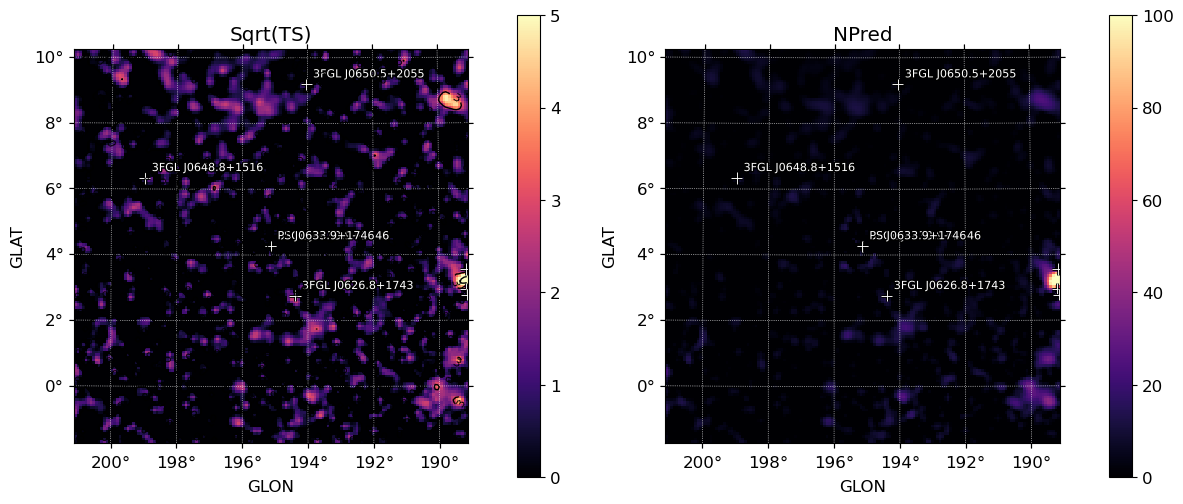

In [79]:
plt.clf()
fig = plt.figure(figsize=(14,6))
ROIPlotter(tsmap_relnewsources['sqrt_ts'],roi=gta.roi).plot(levels=[0,3,6,10],vmin=0,vmax=5,subplot=121,cmap='magma')
plt.gca().set_title('Sqrt(TS)')
ROIPlotter(tsmap_relnewsources['npred'],roi=gta.roi).plot(vmin=0,vmax=100,subplot=122,cmap='magma')
plt.gca().set_title('NPred')
plt.show()

The TSmap now shows that the OFF-phase pulsar has been successfully modelled out.

2024-08-06 14:10:50 INFO    GTBinnedAnalysis.write_xml(): Writing /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/Geminga_data/rel_newsources_00.xml...
2024-08-06 14:10:50 INFO    GTBinnedAnalysis.write_xml(): Writing /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/Geminga_data/rel_newsources_01.xml...
2024-08-06 14:10:50 INFO    GTAnalysis.write_fits(): Writing /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/Geminga_data/rel_newsources.fits...
2024-08-06 14:11:04 INFO    GTBinnedAnalysis.write_model_map(): Generating model map for component 00.
2024-08-06 14:11:04 INFO    GTBinnedAnalysis.write_model_map(): Generating model map for component 01.
2024-08-06 14:11:08 INFO    GTAnalysis.write_roi(): Writing /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/Geminga_data/rel_newsources.npy...


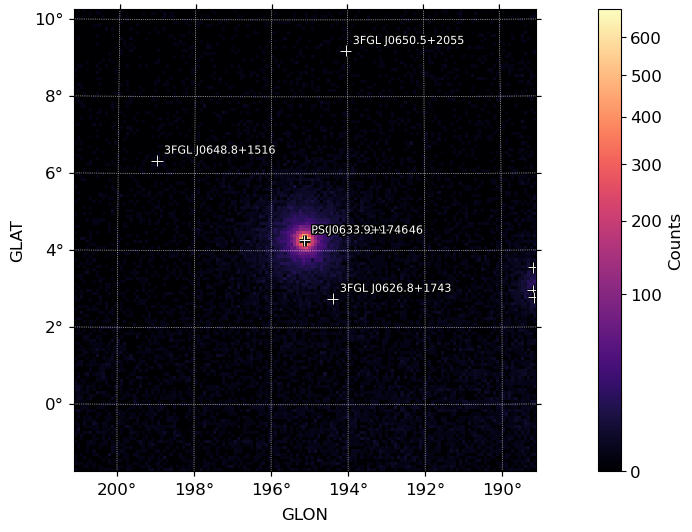

In [80]:
gta.write_roi('rel_newsources',make_plots=True,save_model_map=True)
plt.show()

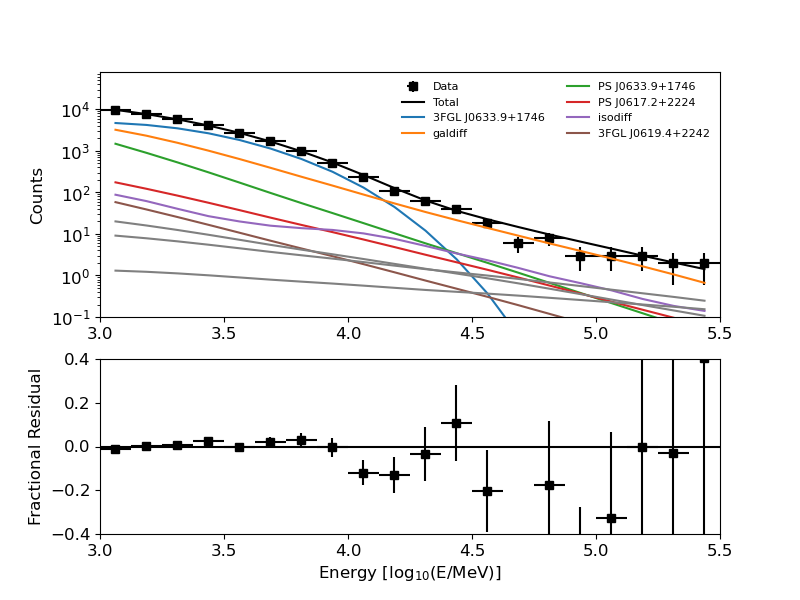

In [81]:
Image(filename='./Geminga_data/rel_newsources_counts_spectrum.png') 

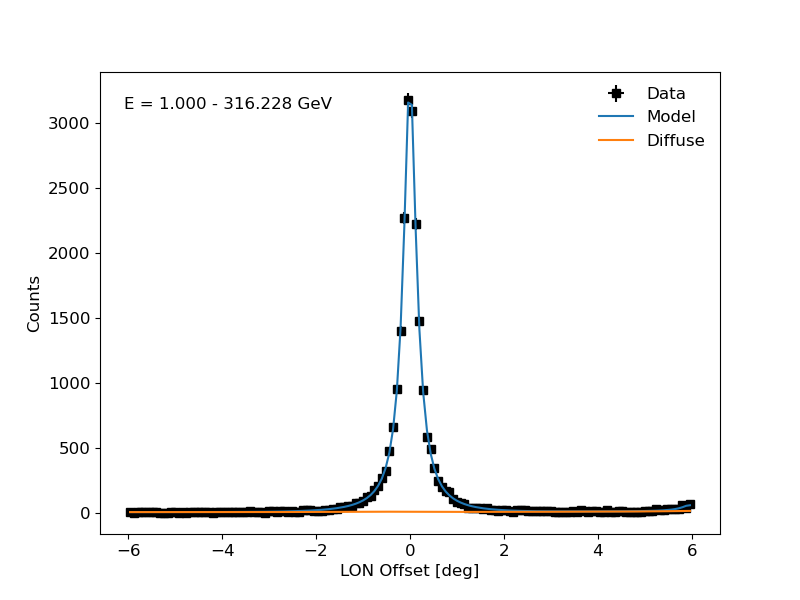

In [82]:
Image(filename='./Geminga_data/rel_newsources_counts_map_xproj_3.000_5.500.png') 

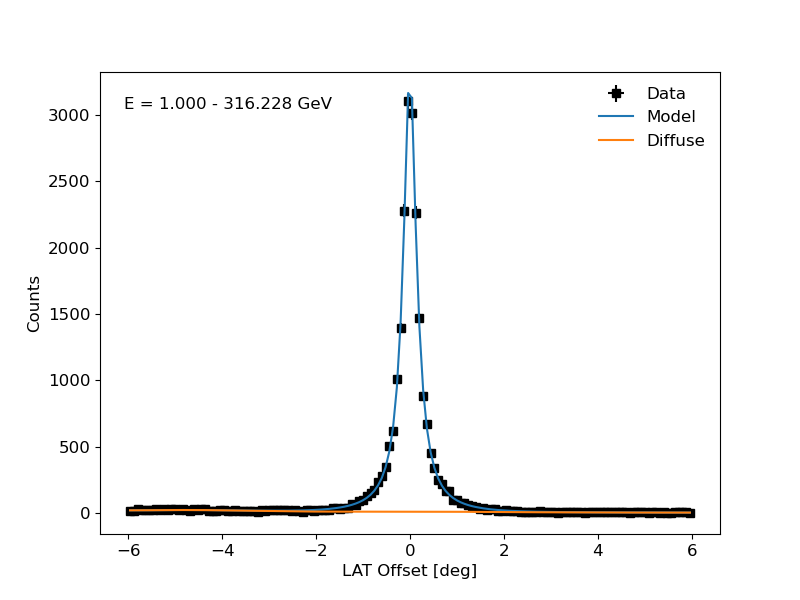

In [83]:
Image(filename='./Geminga_data/rel_newsources_counts_map_yproj_3.000_5.500.png') 

As we can see from the plots above all the residuals have disappeared.

Now we derive the SED of the on and off-phase components of Geminga.

In [84]:
gta.print_model()
gta.free_sources(free=False)
gta.free_sources(skydir=gta.roi[gta.roi.sources[0].name].skydir,distance=[3.0],free=True)
gta.print_model()

2024-08-06 14:11:12 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0633.9+1746      0.002   1.003  0.000737   2.78  59675.84     19239.6    *
PS J0633.9+1746        0.006   2.184  0.000232   2.94  12053.42      3625.6    *
3FGL J0626.8+1743      1.684   0.000  1.28e-12   5.00     -0.00         0.0    *
3FGL J0648.8+1516      4.358   1.310  2.02e-05   1.68    155.83        53.9    *
3FGL J0650.5+2055      5.040   0.731   8.2e-06   1.41     38.27        11.6    *
3FGL J0619.4+2242      5.980   1.279  2.25e-05   2.67    132.27       169.7    *
PS J0617.2+2224        6.065   4.159  7.34e-05   2.54    820.75       549.4    *
PS J0616.4+2221        6.142   0.481  2.49e-05   2.04     44.31        88.3    *
isodiff                  ---   0.458    0.0138   2.12     15.96       312.6    *
galdiff                  ---   1.002     0.132  -0.00 

Calculate the SED for both the ON- and OFF-phase components of the model

In [85]:
Geminga_onphase = gta.sed(gta.roi.sources[0].name, bin_index=2.2, outfile='sedGeminga_onphase.fits', loge_bins=None,write_npy=True,write_fits=True,make_plots=True)

2024-08-06 14:11:13 INFO    GTAnalysis.sed(): Computing SED for 3FGL J0633.9+1746
2024-08-06 14:11:13 INFO    GTAnalysis._make_sed(): Fitting SED
2024-08-06 14:11:13 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0633.9+1746     : ['Index1', 'Cutoff']
2024-08-06 14:11:13 INFO    GTAnalysis.free_source(): Fixing parameters for PS J0633.9+1746       : ['Index']
2024-08-06 14:11:13 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0626.8+1743     : ['Index']
2024-08-06 14:11:13 INFO    GTAnalysis.free_source(): Fixing parameters for galdiff               : ['Index']
/home/pmarinos/miniforge3/envs/fermipy/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:313: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.

In [86]:
Geminga_offphase = gta.sed(gta.roi.sources[1].name, bin_index=2.2, outfile='sedGeminga_offphase.fits', loge_bins=None,write_npy=True,write_fits=True,make_plots=True)

2024-08-06 14:11:27 INFO    GTAnalysis.sed(): Computing SED for PS J0633.9+1746
2024-08-06 14:11:27 INFO    GTAnalysis._make_sed(): Fitting SED
2024-08-06 14:11:27 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0633.9+1746     : ['Index1', 'Cutoff']
2024-08-06 14:11:27 INFO    GTAnalysis.free_source(): Fixing parameters for PS J0633.9+1746       : ['Index']
2024-08-06 14:11:27 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0626.8+1743     : ['Index']
2024-08-06 14:11:27 INFO    GTAnalysis.free_source(): Fixing parameters for galdiff               : ['Index']
2024-08-06 14:11:30 INFO    GTAnalysis.sed(): Finished SED
2024-08-06 14:11:41 INFO    GTAnalysis.sed(): Execution time: 14.47 s


Show the SED plots for both components.

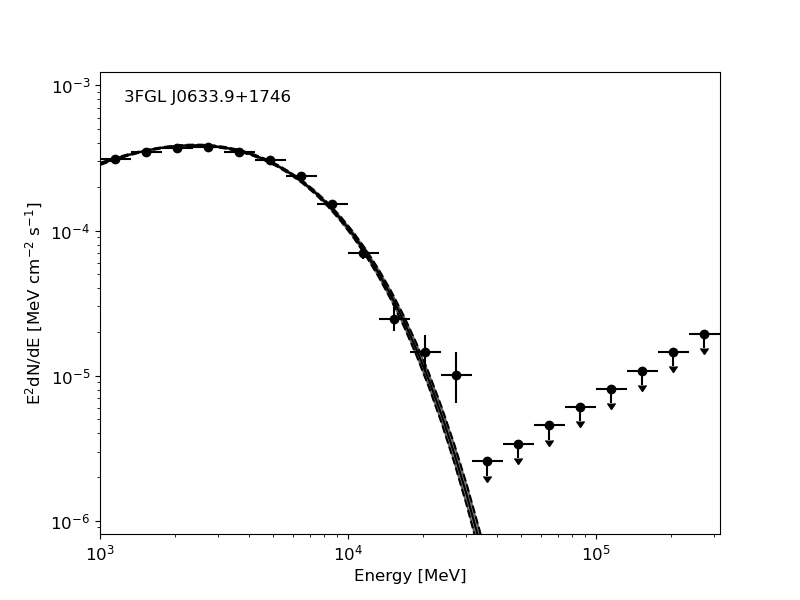

In [87]:
Image(filename='./Geminga_data/3fgl_j0633.9+1746_sed.png')

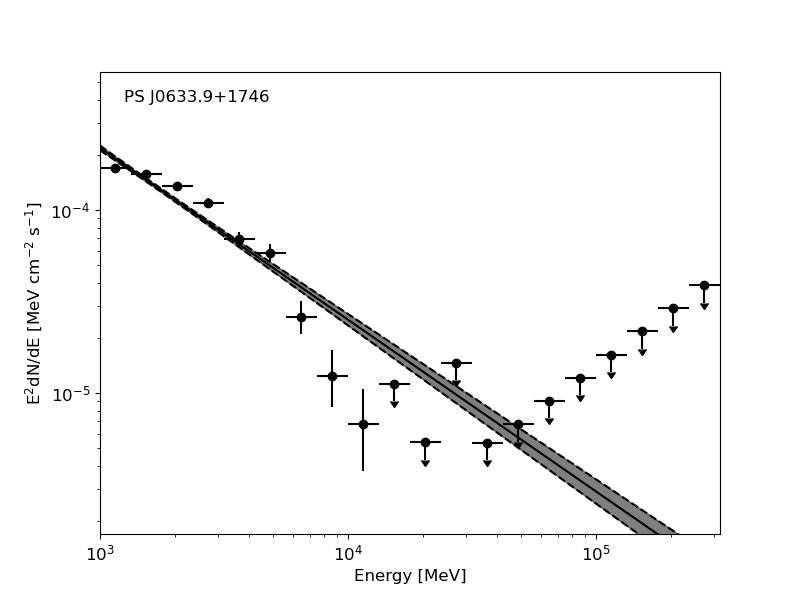

In [88]:
Image(filename='./Geminga_data/ps_j0633.9+1746_sed.png')

The SED of the on phase and off-phase components of Geminga are very similar and they are both compatible with a power-law with an exponential cutoff. The off-phase flux is about a factor of two lower than the on-phase flux, which is approximately what would be expected by looking at the phase plot.

We can now search for a possible extension of the off-phase component.

In [89]:
gta.free_sources(free=False)
gta.print_model()
gta.free_sources(skydir=gta.roi[gta.roi.sources[0].name].skydir,distance=[1.0],free=True)
gta.print_model()
extensionsmc = gta.extension(gta.roi.sources[1].name,update=True,make_plots=True,sqrt_ts_threshold=3.0,spatial_model='RadialGaussian')
gta.print_model()

2024-08-06 14:11:41 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0633.9+1746     : ['Prefactor', 'Index1', 'Cutoff']
2024-08-06 14:11:41 INFO    GTAnalysis.free_source(): Fixing parameters for PS J0633.9+1746       : ['Prefactor', 'Index']
2024-08-06 14:11:41 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0626.8+1743     : ['Prefactor', 'Index']
2024-08-06 14:11:41 INFO    GTAnalysis.free_source(): Fixing parameters for isodiff               : ['Normalization']
2024-08-06 14:11:41 INFO    GTAnalysis.free_source(): Fixing parameters for galdiff               : ['Prefactor', 'Index']
2024-08-06 14:11:41 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0633.9+1746      0.002   1.003  0.000737   2.78  59675.84     19239.6     
PS J0633.9+1746        0.006   2.184  0.000232   2.94  12053.42      3625.6     


{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 1.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': True, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}
{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 1.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': True, 'write_fits'

2024-08-06 14:12:19 WARNING GTAnalysis.extension(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/Geminga_data/ps_j0633.9+1746_ext.npy
2024-08-06 14:12:19 INFO    GTAnalysis.extension(): Execution time: 37.13 s
2024-08-06 14:12:19 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0633.9+1746      0.002   1.003  0.000737   2.78  59675.84     19239.6    *
PS J0633.9+1746        0.006   2.184  0.000232   2.94  12053.42      3625.6    *
3FGL J0626.8+1743      1.684   0.000  1.28e-12   5.00     -0.00         0.0     
3FGL J0648.8+1516      4.358   1.310  2.02e-05   1.68    155.83        53.9     
3FGL J0650.5+2055      5.040   0.731   8.2e-06   1.41     38.27        11.6     
3FGL J0619.4+2242      5.980   1.279  2.25

{'name': 'PS J0633.9+1746', 'file': None, 'config': {'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 1.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': True, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}, 'width': array([0.        , 0.01      , 0.01258925, 0.01584893, 0.01995262,
       0.02511886, 0.03162278, 0.03981072, 0.05011872, 0.06309573,
       0.07943282, 0.1       , 0.12589254, 0.15848932, 0.19952623,
       0.25118864, 0.31622777, 0.39810717, 0.50118723, 0.63095734,
       0.79432823, 1.        ]), 'dloglike': array